In [98]:
import pandas as pd
import numpy as np

In [99]:
dataset = pd.read_csv("insurance.csv")
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [100]:

dataset

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16885
1,18,2,33.770,1,2,1726
2,28,2,33.000,3,2,4449
3,33,2,22.705,0,2,21984
4,32,2,28.880,0,2,3867
...,...,...,...,...,...,...
1333,50,2,30.970,3,2,10601
1334,18,1,31.920,0,2,2206
1335,18,1,36.850,0,2,1630
1336,21,1,25.800,0,2,2008


In [69]:
ind = dataset[['age','sex', 'bmi','children','smoker']]
ind

,age,sex,bmi,children,smoker
0,19,1,27.900,0,1
1,18,2,33.770,1,2
2,28,2,33.000,3,2
3,33,2,22.705,0,2
4,32,2,28.880,0,2
...,...,...,...,...,...
1333,50,2,30.970,3,2
1334,18,1,31.920,0,2
1335,18,1,36.850,0,2
1336,21,1,25.800,0,2


In [101]:
dep = dataset[['charges']]
dep

,charges
0,16885
1,1726
2,4449
3,21984
4,3867
...,...
1333,10601
1334,2206
1335,1630
1336,2008


In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ind, dep, test_size=0.50, random_state=0)

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [211]:
regressor = DecisionTreeRegressor(criterion='poisson', splitter='random')
regressor = regressor.fit(x_train,y_train)


[Text(0.3322385449553711, 0.9736842105263158, 'x[4] <= 1.39\npoisson = 4601.425\nsamples = 669\nvalue = 13474.572'),
 Text(0.10240294667913938, 0.9210526315789473, 'x[0] <= 28.316\npoisson = 2222.121\nsamples = 141\nvalue = 31432.553'),
 Text(0.04439507327720611, 0.868421052631579, 'x[2] <= 33.308\npoisson = 1846.792\nsamples = 40\nvalue = 26133.5'),
 Text(0.029544745868412846, 0.8157894736842105, 'x[2] <= 30.317\npoisson = 1472.204\nsamples = 30\nvalue = 22433.133'),
 Text(0.016682257561584035, 0.7631578947368421, 'x[2] <= 24.809\npoisson = 401.286\nsamples = 22\nvalue = 17848.273'),
 Text(0.006859993763642033, 0.7105263157894737, 'x[1] <= 1.901\npoisson = 158.249\nsamples = 7\nvalue = 16000.571'),
 Text(0.002494543186778921, 0.6578947368421053, 'x[0] <= 20.907\npoisson = 120.462\nsamples = 3\nvalue = 17315.333'),
 Text(0.0012472715933894605, 0.6052631578947368, 'poisson = 0.0\nsamples = 1\nvalue = 20167.0'),
 Text(0.0037418147801683817, 0.6052631578947368, 'x[3] <= 1.525\npoisson = 8

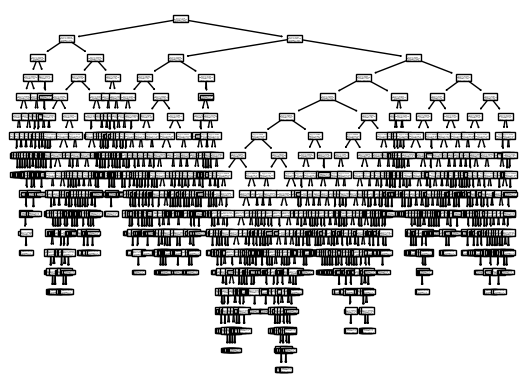

In [213]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)


In [221]:
y_pred=regressor.predict(x_test)

In [223]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)

In [225]:
print(r_score)

0.6403758734506656


In [51]:
import pickle
import numpy as np
filename = "mi_dt.sav"
pickle.dump(regressor,open(filename,'wb'))

In [71]:
loaded_model=pickle.load(open("mi_dt.sav",'rb'))
input_data = np.array([[ 0, 128, 107, 108, 4.81, 12, 202, 210, 45, 0, 0, 1, 1]])
result = loaded_model.predict(input_data)

print(result)

[1.]


C:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
